<a href="https://colab.research.google.com/github/KaiyaBullock/MAT421/blob/main/ModG_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21.4 Simpson's Rule
Simpson's Rule approxiamtes the area under $f(x)$ over the subintervals $[x_{i-1},x_i]$ and $[x_i,x_{i-1}]$ by fitting a quadratic polynomial through the points $(x_{i-1},f(x_{i-1})), (x_i,f(x_i)),$ and $(x_{i+1},f(x_{i+1}))$ and then integrating the quadratic exactly.

For this approxiamtion technique to work, there must be an even number of intervals and, therefore, an odd number of grid points.

$∫_{x_{i-1}}^{x_{i+1}}f(x)dx = \frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1})+O(h^5)$

The example below uses Simpson's Rule to approximate $∫_0^πcos(x)dx$

In [5]:
import numpy as np

a=0
b=np.pi
n=11
h=(b-a)/(n-1)
x=np.linspace(a,b,n)
f=np.sin(x)

I_simp=(h/3)*(f[0]+2*sum(f[:n-2:2])\
                +4*sum(f[1:n-1:2])+f[n-1])
err_simp=2-I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


# 21.5 Computing Integrals in Python
The *scipy.integrate* sub-package has several functions for computing integrals. The *trapz* takes as input arguments an array of function values $f$ computed on a numerical grid $x$

In [6]:
import numpy as np
from scipy.integrate import trapz

a=0
b=np.pi
n=11
h=(b-a)/(n-1)
x=np.linspace(a,b,n)
f=np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0]+2*sum(f[1:n-1])+f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


Sometimes we want to know the approxiamted cumulative integral. That is, we want to know $F(X)=∫_{x_0}^Xf(x)dx. For this purpose, it is useful to use the *cumtrapz* function *cumsum*, which takes the same input arguments as *trapz*.

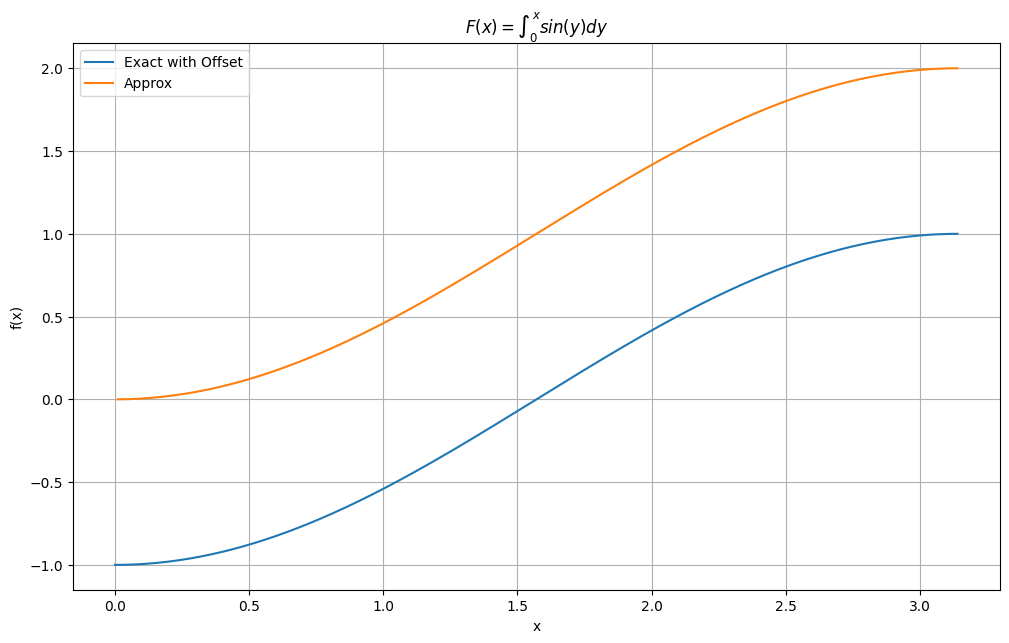

In [8]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0,np.pi,0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x),x)

plt.figure(figsize = (10,6))
plt.plot(x,F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x)=\int_0^xsin(y)dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset','Approx'])
plt.show()

The *quad(f,a,b)* function uses a different numerical differentiation scheme to approximate integrals. *quad* integrates the function defines by the function object, $f$, from $a$ to $b$.

In [9]:
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin,0,np.pi)
print(I_quad)
err_quad=2-I_quad
print(est_err_quad,err_quad)

2.0
2.220446049250313e-14 0.0
